# ROS
ROS (ang. Robot Operating System) jak nazwa wskazuje nie jest jednak systemem operacyjnym. Zapewnia wsparcie dla niskopoziomowych urządzeń oraz łatwą komunikację między procesami. Zaletą jest fakt, że przy tworzeniu nowego robota użytkownik najprawdopodobniej nie będzie musiał martwić się o obsługę danych czujników na niskim poziomie. Istnieje duże prawdopodobieństwo, że już ktoś inny napisał taką obsługę i ją udostępnił. Takie podejście pozwala na szybsze przejście do tworzenia bardziej zaawansowanych algorytmów bez konieczności odtwarzania "koła na nowo".

Jest w pełni darmowy zarówno w celach prywatnych, naukowych jak i komercyjncy co zwiększa jego popularność.

# ROS - System plików
W systemie plików można wyróżnić następujące typy:
- **packages** - podstawowa jednostka organizacji plików, zawiera nody, struktuy wiadomości i serwisów, pliki konfiguracyjne z parametrami. Pliki w niej zawarte odpowiadają za realizację ściśle wyizolowanego zadania np. komunikacja ze skaneram laserowym i odczyt danych, wyznaczenie lokalizacji robota, odczyt danych z joysticka, odebranie informacji o joysticku i wysterowanie prędkości postępowych i obrotowych robota
- **metapackages** - pozwalają na logiczne zgrupowanie różnych paczek w jedną np. paczka "navigation", "turtlebot3". W porównaniu do **packages** nie zawiera ona nodów, typów wiadomości, serwisów, tylko informację o podstawowej konfiguracji i zależnościach od innych paczek.
- **package manifests** - zawiera podstawowe informacje o paczce takie jak nazwa, wersja, autor, licencja, zależności od innych paczek oraz wiele więcej
- **repositories** - paczki przechowywane są na repozytoriach z kontrolą wersji, a także z wykorzystaniem **bloom**, które umożliwia m.in. instalowanie paczek ROS przy użyciu *apt-get install*.
- **message (msg)** - zawiera informację o strukturze wiadomości
- **service (srv)** - zawiera informację o strukturze serwisowu (struktura wiadomości wysyłana przez klienta i odsyłana odpowiedź przez serwer)

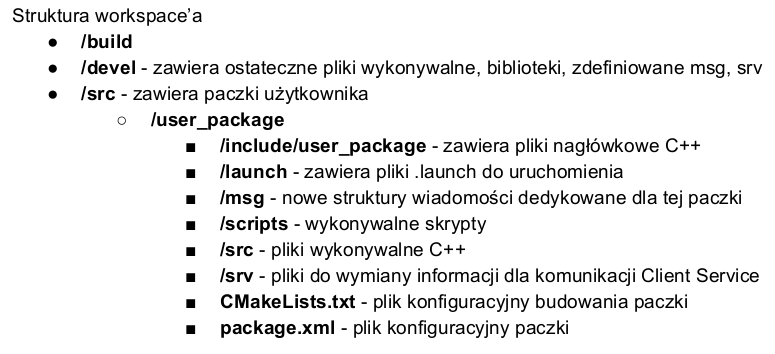

# ROS Computation Graph
ROS bazuje na architekturze komunikacji peer-to-peer, tzn. każdy węzeł podłączony do sieci może jednocześnie nadawać i odbierać dane od innych węzłów. W skład *Computation Graph* wchodzą: 

- **master** - umożliwia komunikację i wymianę informacji. Bez niego nie jest możliwe korzystanie z możliwości ROS.

- **nodes** - proces odpowiedzialny za obliczenia. W systemie robotycznym można wyróżnić np. nody odpowiedzialne za wyznaczenie lokalizacji, nawigację, obsługę kamer, obsługę pojedynczych czujników.

- **parameter server** - baza danych z parametrami. Przykłady: parametry stałe czujników, które są wykorzystywane w node'ach, dokładność dojazdu robota do punktu, opis robota.

- **messages** - są to informacje przekazywane/odbierane przez różne node'y w systemie. Składają się z podstawowych typów (np. int, float, string) jak i bardziej złożonych (np. struktura punktu ze współrzędnymi x,y). Jako przykład można podać przekazanie informacji o położeniu od node'a od lokalizacji do node'a odpowiedzialnego za nawigację.

- **topics** - jeden z nodów nadaje wiadomość na topic'u o określonej nazwie. Każdy node który chce odbierać i wykorzystywać informacje pojawiające się na nim ma taką możliwość. Przykładem może być odbieranie danych z kamery na robocie i przekazywanie ich dalej. Operator robota może odbierać dane z kamery i wyświetlać je u siebie. Jeden z nodów znajdujących się na robocie może być odpowiedzialny za wykrywanie przedmiotów na obrazie. 

- **services** - jest to typ komunikacji klient-serwer. Dane przekazywane są do klienta na jego żądanie. W systemie robotycznym może być do zlecenie wykonanie jakiegoś zadania przez robota i konieczne jest oczekiwanie na odpowiedź potwierdzającą wykonanie akcji.

- **bags** - służy do zapisywania i odtwarzania pojawiających się w systemie wiadomości

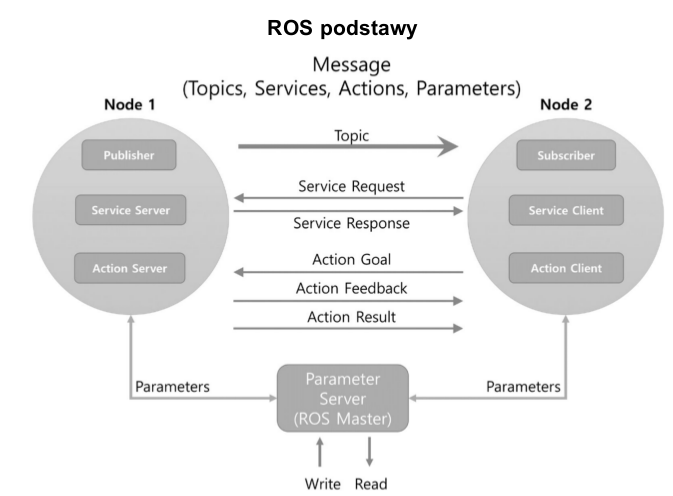

## Master 

Roscore jest masterem, który zarządza informacjami o połączeniach dla komunikacji pomiędzy nodami (węzłami) i jest istotnym elementem, który musi być uruchomiony jako pierwszy w celu korzystania z systemu ROS. 

ROS master jest uruchamiany poleceniem 'roscore'. Master rejestruje informacje o nodach,
takie jak nazwy, topici i serwisy, typy wiadomości, adresy URI i porty. W razie potrzeby informacje te są przekazywane do innych węzłów. 

Po uruchomieniu "roscore", uruchamiany jest również "rosout", który jest używany do rejestrowania standardowych logów ROS, takich jak DEBUG, INFO, WARN, ERROR, FATAL,
itd. Uruchamiany jest również serwer parametrów, który zarządza parametrami w systemie.

W tym celu w terminalu należy wpisać:

In [4]:
#from run_lx import run_lxterminal

In [ ]:
#run_lxterminal("rosrun turtlesim turtlesim_node")

In [2]:
!rostopic list

/Delmiak/cmd_vel
/Delmiak/pose
/rosout
/rosout_agg
/turtle1/cmd_vel
/turtle1/color_sensor
/turtle1/pose


In [3]:
!rosnode list

/rosout
/serwis_node_test
/turtlesim
/widgets_controller


## Uruchomienie node'a
Uruchomienie przykładowego node'a w terminalu. Jest to symulator robota żółwia, na którym oparte będą dalsze ćwiczenia. Podstawowy sposób uruchomienia node'a w termminalu:

***rosrun nazwa_paczki nazwa_node'a***


**Poniższe node'y uruchomić w terminalu**

Uruchomienie node'a następuje przez użycie polecenia:


Sterowanie robotem

## Tworzenie node'a - Python
W pojawiających się skryptach do laboratorium do komunikacji z innymi nodami musi pojawić się tylko jedna inicjalizacja node'a (*rospy.init_node*).

In [2]:
import rospy

node_name= "gibek" # UZUPEŁNIĆ własną nazwą
rospy.init_node(node_name, anonymous=False)

ROSException: rospy.init_node() has already been called with different arguments: ('test', ['/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py', '-f', '/home/ubuntu/.local/share/jupyter/runtime/kernel-7c625216-15d4-4b8c-a750-c20d3b847bdc.json'], True, None, False, False)

In [3]:
import rosnode
rosnode.get_node_names()

['/test_965_1618562832559',
 '/turtlesim',
 '/rosout',
 '/rqt_gui_py_node_1526',
 '/teleop_turtle']

## Launch file 
Pozwala na uruchomienie wielu node'ów na raz wraz z konfiguracją parametrów. 

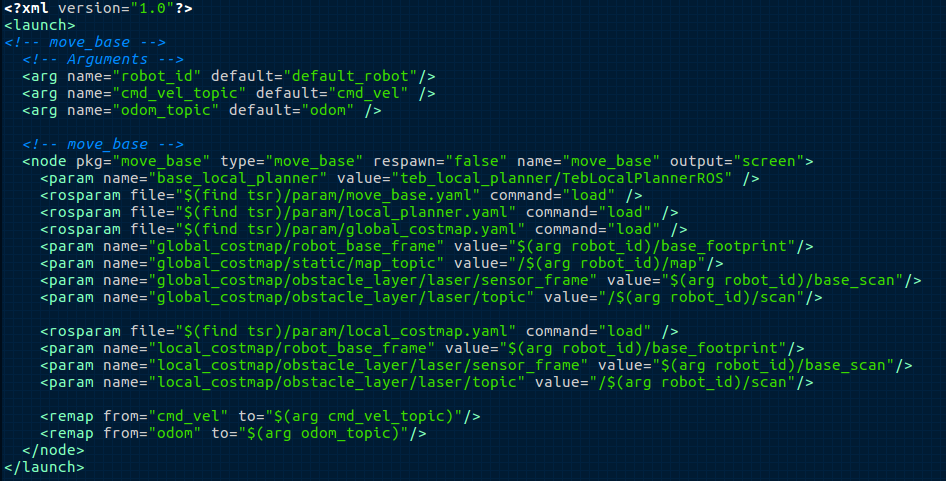

Ponniższe polecenia uruchomić w oddzielnych terminalach.Podstawowy sposób uruchomienia node'a w termminalu:

***rosrun nazwa_paczki nazwa_launch'a***

Przykładowe launche do uruchomienia w nowych terminalach:

# GAZEBO, RVIZ

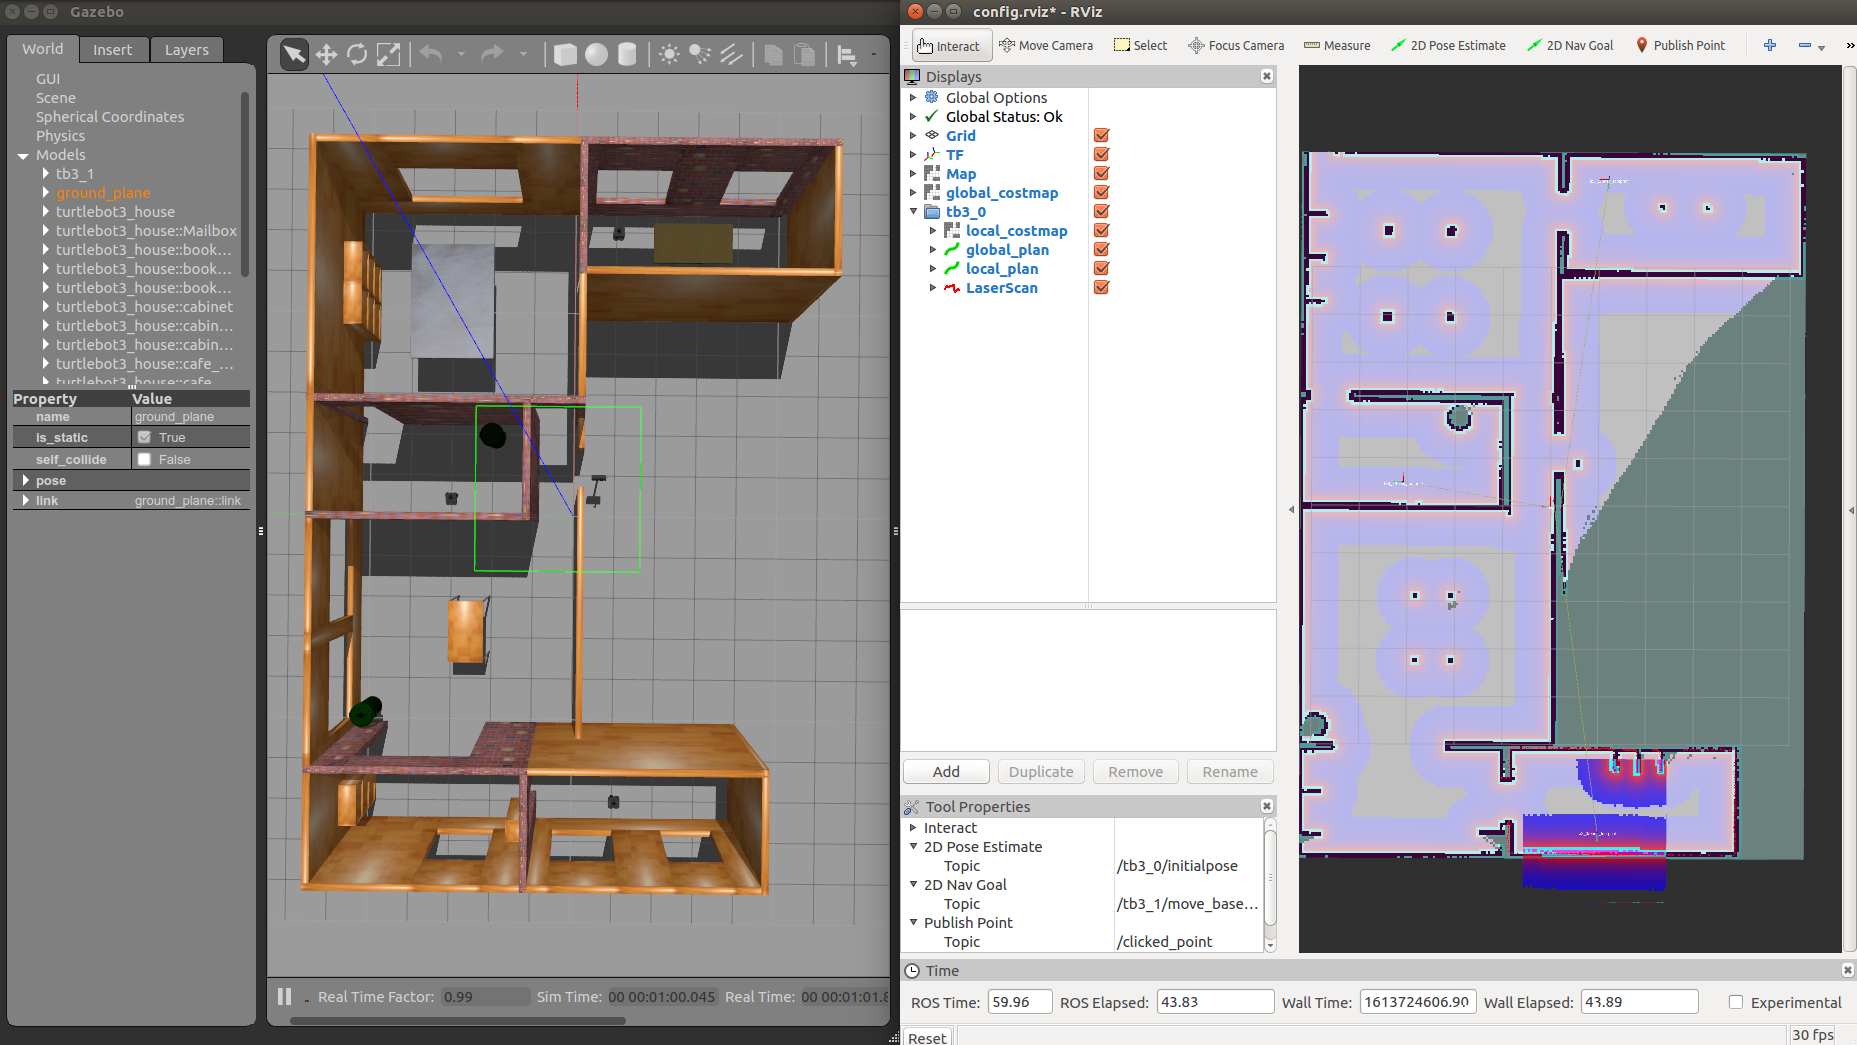

# Rqt Graph
Służy do wyświetlania nodów, topiców z podziałem na aktywne/nieaktywne/wszystkie.
Nazwy nodów zapisane są w owalnych kształtach (np. /tb3_1/amcl). Nawzy topiców w pojedynczych prostokątach (np. /tb3_1/cmd_vel). Zgrupowane elementy w jednej przestrzeni nazw zgrubowane są większym prostokątem (np. /tb3_1)

In [1]:
!rosrun rqt_graph rqt_graph

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-ubuntu'
^C


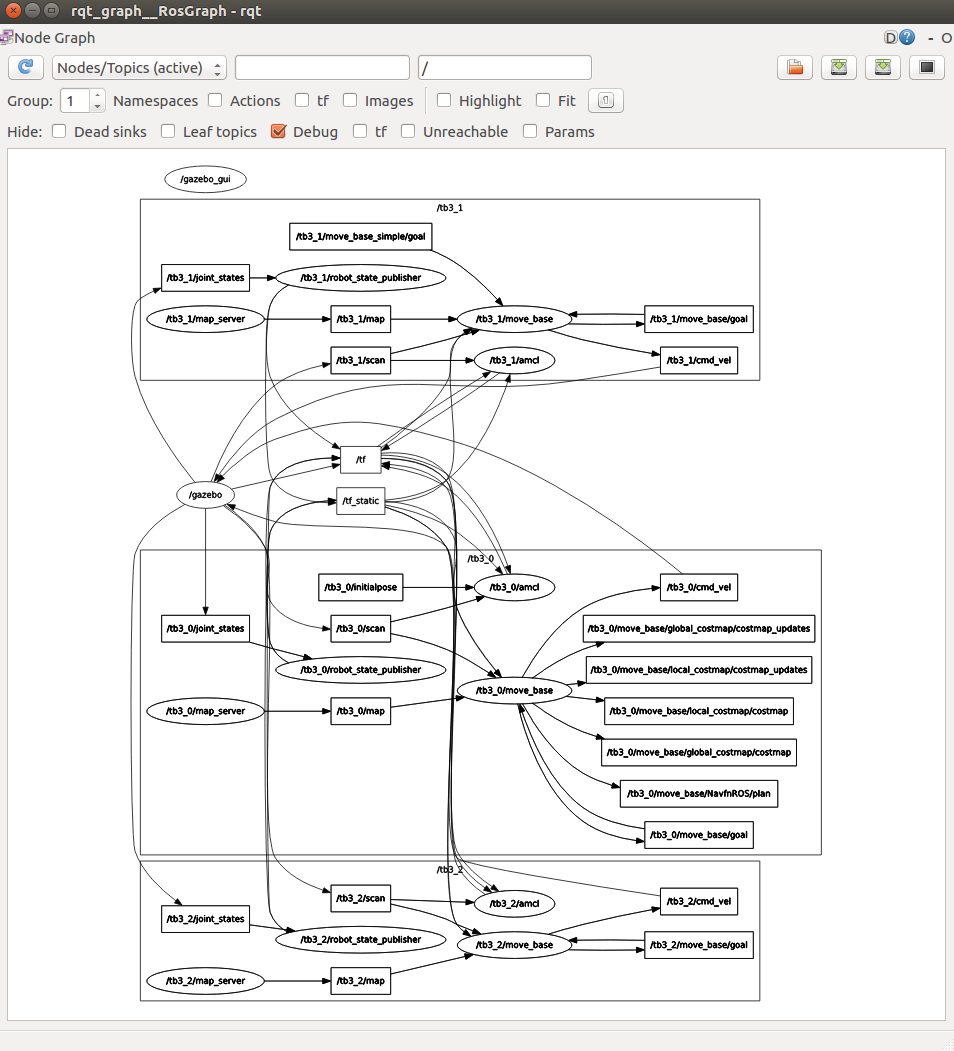

# Rqt tf tree
Służy do wyświetlania układów współrzędnych TF i zależności pomiędzy nimi.

In [ ]:
!rosrun rqt_tf_tree rqt_tf_tree

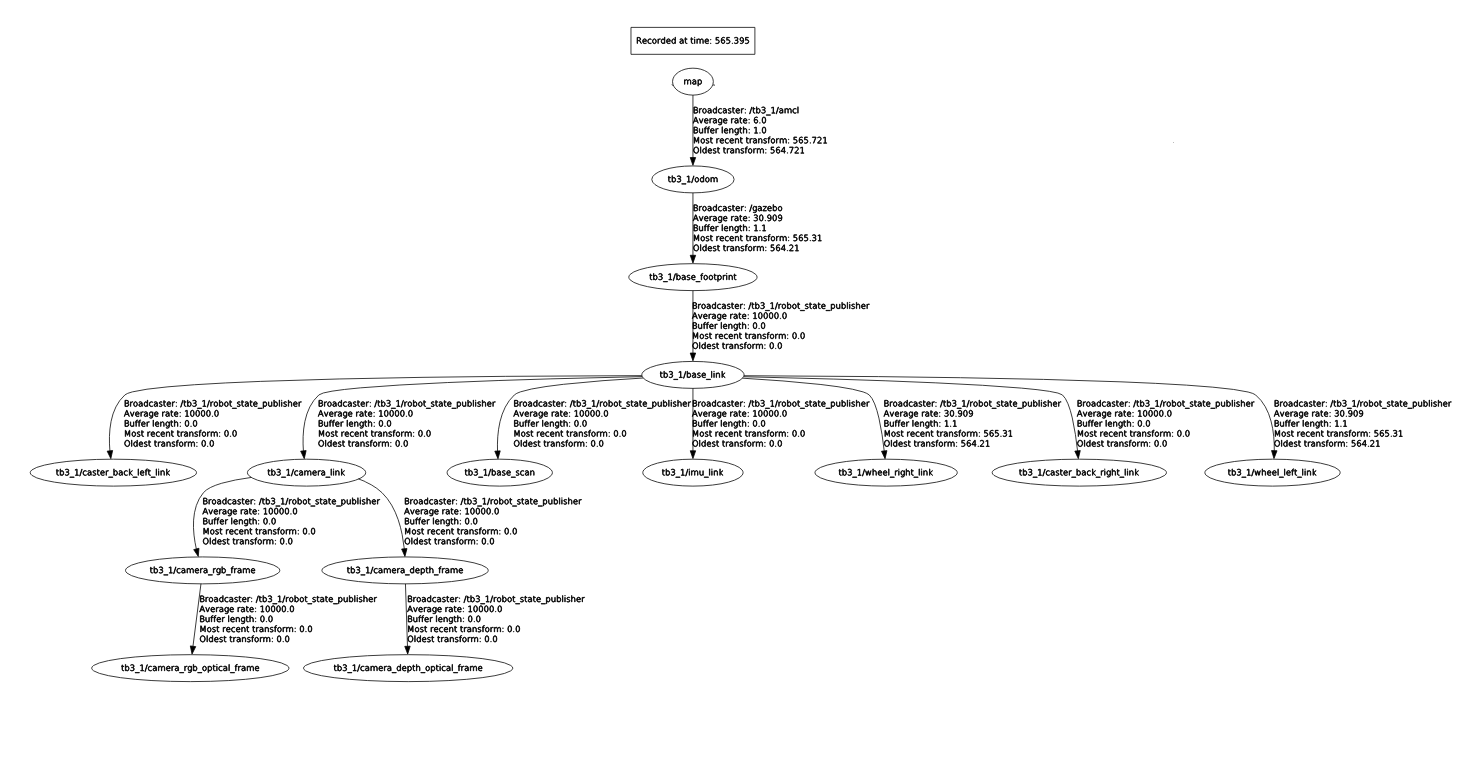


# Rqt plot

In [ ]:
!rosrun rqt_plot rqt_plot

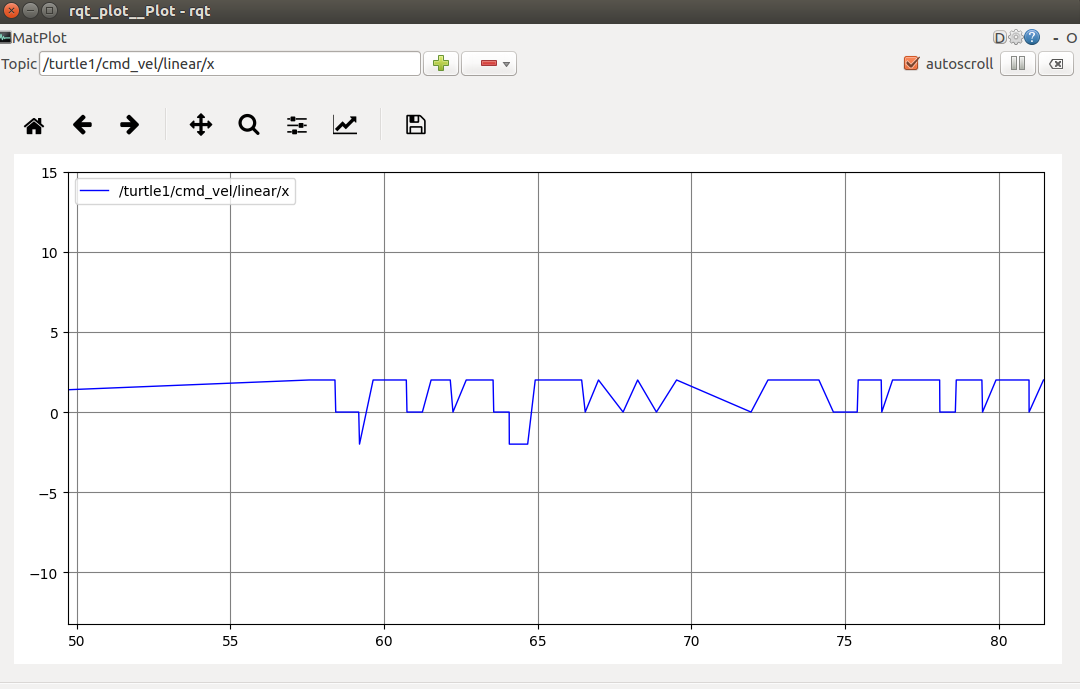

# Komentarze

Nodes:
1) /turtlesim

2) /teleop_turtle

1) Node = Executable that uses ROS to communicate with other nodes

In [5]:
!rosnode list

/Talker
/rosout
/rostopic_4764_1619177936842
/teleop_turtle
/turtlesim


In [3]:
!rosnode info /turtlesim

--------------------------------------------------------------------------------
Node [/turtlesim]
Publications: 
 * /rosout [rosgraph_msgs/Log]
 * /turtle1/color_sensor [turtlesim/Color]
 * /turtle1/pose [turtlesim/Pose]

Subscriptions: 
 * /turtle1/cmd_vel [unknown type]

Services: 
 * /clear
 * /kill
 * /reset
 * /spawn
 * /turtle1/set_pen
 * /turtle1/teleport_absolute
 * /turtle1/teleport_relative
 * /turtlesim/get_loggers
 * /turtlesim/set_logger_level


contacting node http://localhost:34783/ ...
Pid: 1080
Connections:
 * topic: /rosout
    * to: /rosout
    * direction: outbound (53919 - 127.0.0.1:47996) [16]
    * transport: TCPROS

